In [1]:
## 6장 LeNet-5
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Input

In [2]:
# 모델 생성 (subclass 방식)
num_class = 2
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
        
        self.add(Input(input_shape))
        self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu',
                       padding="same"))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))
        
        self.compile(optimizer='adam',loss= categorical_crossentropy, metrics=['accuracy'])

In [3]:
model = LeNet((100,100,3), num_class)
model.summary()

Model: "le_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 50, 50, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 23, 23, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,015,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029,006 (3.93 MB)

 Trainable params: 1,029,006 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './data/catanddog/train/'
valid_dir = './data/catanddog/validation/'


In [5]:
# 훈련 이미지
train = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical")

# 검증 이미지
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator= valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [6]:
# 텐서 보드 적용...
# 1. 동작 log를 저장할 디렉터리 지정
log_dir = "./img/log1/"     # 훈련 데이터를 ./img/log1/ 디렉터리 저장.
# 2. tensorboard 객체생성
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir = log_dir,  # 로그가 저장된 디렉터리
    histogram_freq= 1,  # 에포크마다 출력을 히스토그램으로 기록
    profile_batch= 0    # 비활성화. 시스템 자원 및 시간 사용에 대한 관리  
)
# 3. 모델 학습(텐서보드 callback을 지정)
model.fit(train_generator, epochs=EPOCHS,
          steps_per_epoch=train_num // BATCH_SIZE,      # 정수 나누기
          validation_data = valid_generator,            # 검증 이미지 데이터
          validation_steps = valid_num // BATCH_SIZE,   # 
          callbacks=[tensorboard_callback],             # callbacks 으로 텐서보드 지정(*)
          verbose=1)


Epoch 1/100


d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.4941 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 2/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - loss: 0.6908

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 0.6908 - val_accuracy: 0.5104 - val_loss: 0.6913
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5470 - loss: 0.6901 - val_accuracy: 0.5104 - val_loss: 0.6876
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5312 - loss: 0.6816 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5421 - loss: 0.6822 - val_accuracy: 0.5521 - val_loss: 0.6870
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5312 - loss: 0.6909 - val_accuracy: 0.5312 - val_loss: 0.6867
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5755 - loss: 0.6848 - val_accuracy: 0.5000 - val_loss: 0.7109
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4062 - loss: 0.7694 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5447 - loss: 0.6915 - val_accuracy: 0.5208 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


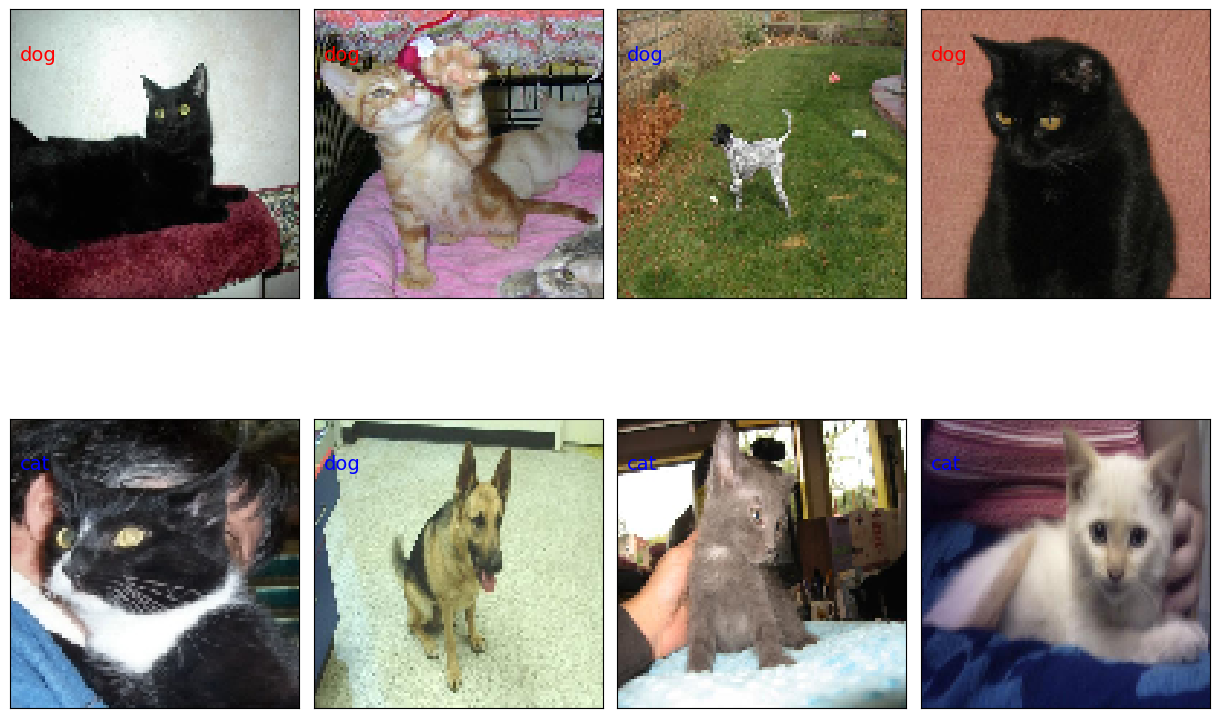

In [10]:
# 검증...(결과 예측)
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='blue', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
test = np.argmax(prediction_values, axis=1)
test

In [12]:
# AlexNet
%load_ext tensorboard
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
# 고양이, 개 데이터를 그대로 사용
# 원래 AlexNet은 클래스 크기가 1000개이나 2개만 사용.
# Subclassing API 방식으로 모델 정의

num_class = 2
class AlexNet(Sequential):
    def __init__(self, input_shape, num_class):
        super().__init__()
        # 입력층
        self.add(Input(input_shape))
        # 1st 합성곱 (96필터들, 커널사이즈 (11,11), 스트라이드=4, 페딩X, 렐루사용)
        self.add(Conv2D(96, kernel_size=(11,11), strides=4, padding='valid', activation='relu',
                        kernel_initializer='he_normal'))
        # 폴링층 (MaxPooling)
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        # 2nd 합성곱 (필터 256, 커널사이즈 (5,5), 스트라이드=1 , 패딩=0, 렐루사용)
        self.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        # 폴링층 (MaxPooling)
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        # 3rd 합성곱 (필터 384, 커널사이즈 (3,3), 스트라이드 = 1, 패딩=0, 렐루사용)
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        # 4rd 합성곱 (...동일)
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        # 5rd 합성곱 (필터 256개, ....)
        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        # 폴링층 (MaxPooling)
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format=None))
        # 완전 연결층
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_class, activation='softmax'))
        
        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])


In [22]:
# 모델생성
model = AlexNet((100,100,3), num_class)
model.summary()

Model: "alex_net_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,825,914 (109.96 MB)

 Trainable params: 28,825,914 (109.96 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = './data/catanddog/train/'
valid_dir = './data/catanddog/validation/'


# 훈련 이미지
train = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical")

# 검증 이미지
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator= valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [26]:
# 텐서보드
# 1. log_dir
log_dir = 'img/log2-AlexNet'
# 2. tensorboard_callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=0)
# 모델 훈련
model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

Epoch 1/100


d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.4844 - loss: 10.8065 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.4375 - loss: 0.6948

d:\tensorflow\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.4375 - loss: 0.6948 - val_accuracy: 0.5104 - val_loss: 0.6919
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.5382 - loss: 0.6904 - val_accuracy: 0.5104 - val_loss: 0.6922
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.5625 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 401ms/step - accuracy: 0.5157 - loss: 0.6915 - val_accuracy: 0.5208 - val_loss: 0.6930
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.4375 - loss: 0.6935 - val_accuracy: 0.4896 - val_loss: 0.6933
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.4980 - loss: 0.6931 - val_accuracy: 0.5104 - val_loss: 0.6926
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.5312 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 430ms/step - accuracy: 0.5095 - loss: 0.6924 - val_accuracy: 0.5000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


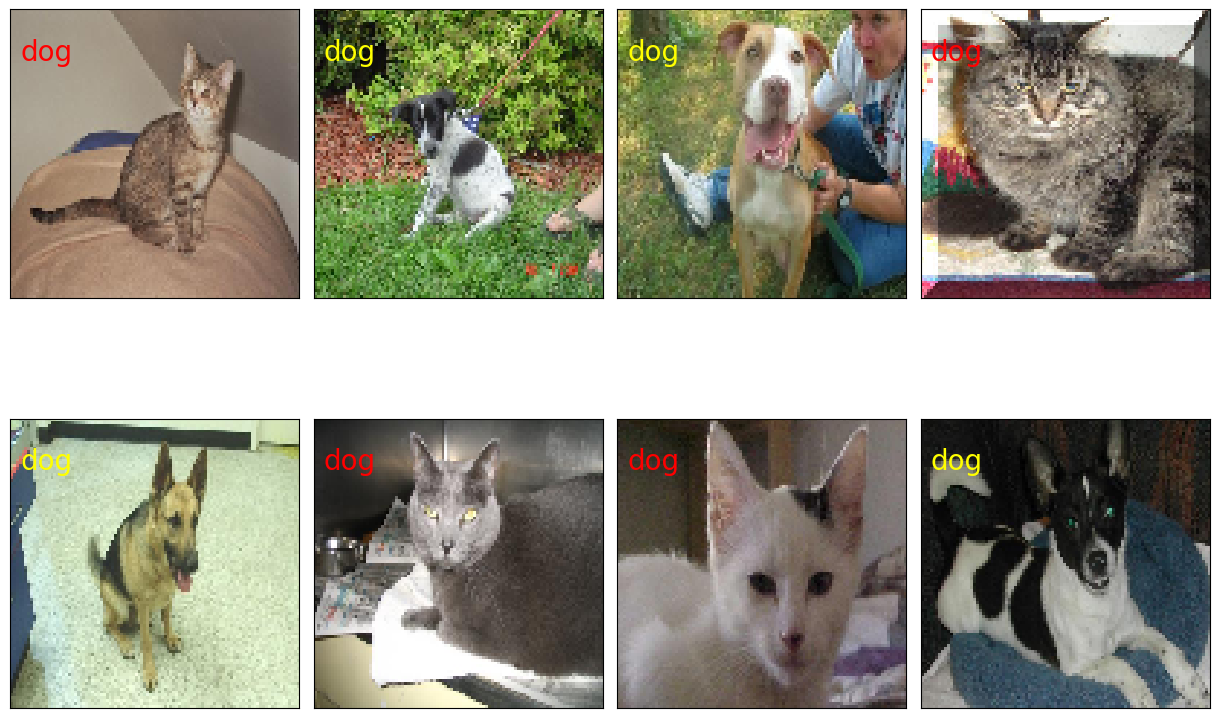

In [32]:
# 시각화 하기

# 검증...(결과 예측)
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=20)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=20)

In [39]:
#이미지 작업(p.207)
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
# 데이터 로드
flowers = tf.keras.utils.get_file(
    'flowr_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)
print(flowers) # 받은 파일의 경로 정보

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
images, labels = next(img_gen.flow_from_directory(flowers+"\\flower_photos"))

C:\Users\Admin\.keras\datasets\flowr_photos
Found 3670 images belonging to 5 classes.


In [61]:
images.shape
# plt.imshow(images[0])
labels.shape
# plt.imshow(labels)

(32, 5)

In [ ]:
# tf.data.Dataset.map # 내장함수다 

ds = tf.data.Dataset.from_generator(
    lambda: ima_gen.flow_from_directory(flowers+"\\flower_photos"),
    output_types = (tf.float32, tf.float32),
    output_shapes = ([32,256,256,3],[32,5])
)
ds.element_spec[0]

TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None)

In [ ]:
# <_FlatMapDataset element_spec=(
#     TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None), 
#     TensorSpec(shape=(32, 5), dtype=tf.float32, name=None)
#     )
# >

In [ ]:
type(ds)
test = ds.map(lambda x, y: (tf.image.central_crop(x, 0.75),y))
test.element_spec



$$\color{yellow}\rule{300px}{2px}$$

In [73]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# 얼굴 인식, 물체 식별, 이미지 결합 등 작업이 가능한 오픈 소스 라이브러리
import cv2 

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [74]:
## VGG19 

class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()
        
        self.add(Input(input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        # 완전 연결층
        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        # 출력층
        self.add(Dense(1000, activation='softmax'))
        
        # 컴파일
        self.compile(
            optimizer=tf.keras.optimizers.Adam(0.003),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        

In [75]:
# 모델생성 및 요약 정보
model = VGG19((224,224,3))
model.summary()

Model: "vgg19_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# 네트워크 훈련 시간이 오래 걸려서 여기서는 사전 훈련된 모델에서 가중치 값을 가져옴
# load_weights() 함수를 사용.
model.load_weights("./data/vgg19_weights_tf_dim_ordering_tf_kernels.h5") 
classes = {
    281: 'tabby, tabby cat',
    282: 'tiger cat',
    283: 'Persian cat',
    284: 'Siamese cat, Siamese',
    285: 'Egyptian cat',
    681: 'notebook, notebook computer',
    817: 'sports car, sport car',
    970: 'alp'} 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Text(0.5, 1.0, 'sports car, sport car')

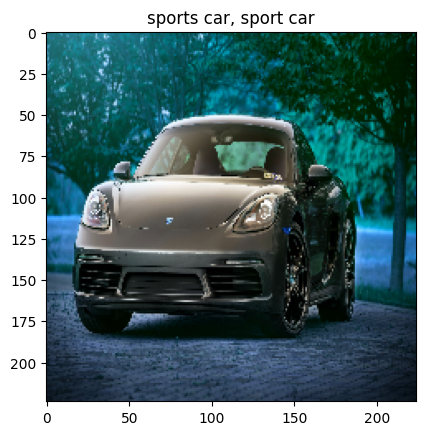

In [90]:
image1 = cv2.imread('./data/sports_car.jpg')
image1 = cv2.resize(image1, (224,224))
plt.figure()
plt.imshow(image1)
image1 = image1[np.newaxis, :] # 차원 확장(행을 추가)
image1.shape
predicted_value = model.predict(image1)
predicted_value = np.argmax(predicted_value)

plt.title(classes[predicted_value]) ## 출력에 대한 타이틀지정